In [1]:
import pandas as pd

# Load the dataset from your specific path
file_path = r'C:\Users\Harshitha\projects\netflix_titles.csv'
df = pd.read_csv(file_path)

# Basic info about the dataset
print(df.info())

# First 5 rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   

In [2]:
# Columns in the dataset
print(df.columns)

# Summary statistics for numerical columns (if any)
print(df.describe())

# Let’s look at unique values in key columns
print("Unique types:", df['type'].unique())
print("Unique ratings:", df['rating'].unique())

# Fill or drop missing values — decide based on column importance
# For example, drop rows where 'type' or 'title' is missing as those are crucial
df_clean = df.dropna(subset=['type', 'title'])

# For other columns like 'director', fill missing with 'Unknown'
df_clean['director'] = df_clean['director'].fillna('Unknown')

# Similarly for 'cast'
df_clean['cast'] = df_clean['cast'].fillna('Unknown')

# For 'country', fill missing with 'Unknown'
df_clean['country'] = df_clean['country'].fillna('Unknown')

# For 'date_added', fill missing with some default or drop (depends on your choice)
df_clean['date_added'] = df_clean['date_added'].fillna('Unknown')

# Verify missing values again
print(df_clean.isnull().sum())


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000
Unique types: ['Movie' 'TV Show']
Unique ratings: ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64


Movies vs TV Shows:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


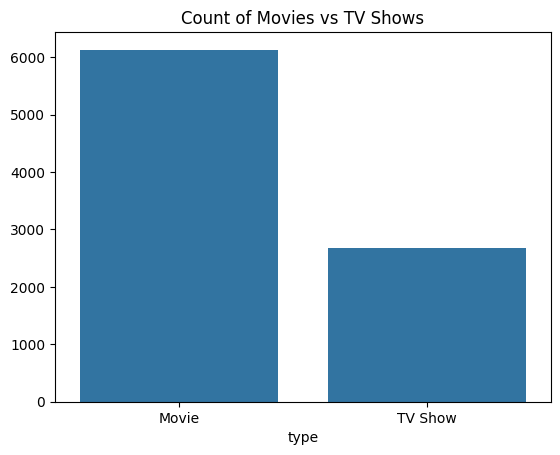

Ratings distribution:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


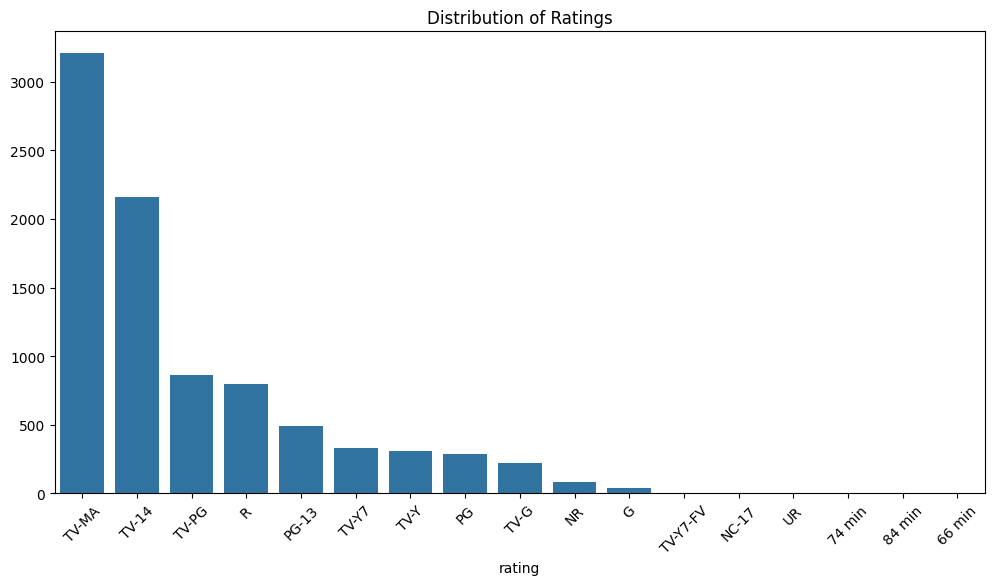

Titles added per year:
year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: count, dtype: int64


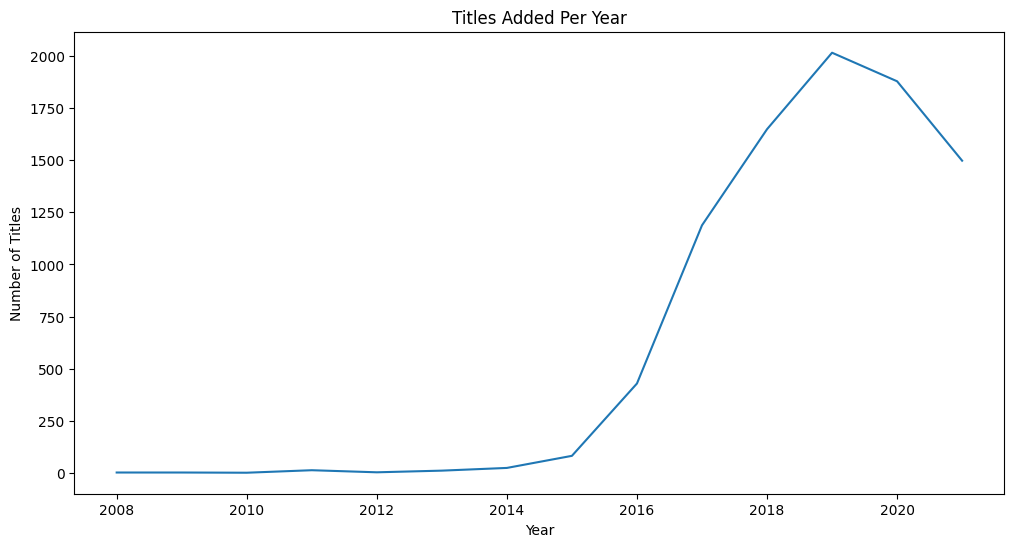

Top 10 countries producing Netflix content:
country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


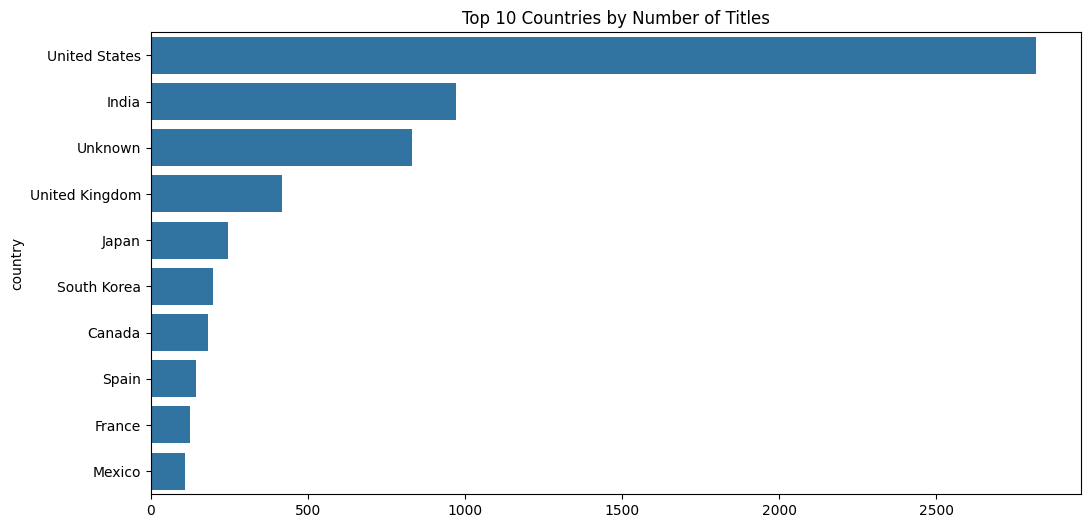

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of Movies vs TV Shows
type_counts = df_clean['type'].value_counts()
print("Movies vs TV Shows:")
print(type_counts)

# Plotting count of Movies vs TV Shows
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Count of Movies vs TV Shows')
plt.show()

# Ratings distribution
rating_counts = df_clean['rating'].value_counts()
print("Ratings distribution:")
print(rating_counts)

plt.figure(figsize=(12,6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)
plt.show()

# Extract year from 'date_added'
def extract_year(date):
    if date != 'Unknown':
        return int(date.strip()[-4:])
    else:
        return None

df_clean['year_added'] = df_clean['date_added'].apply(extract_year)

# Count by year added
year_counts = df_clean['year_added'].value_counts().sort_index()
print("Titles added per year:")
print(year_counts)

plt.figure(figsize=(12,6))
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.title('Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

# Top 10 countries by number of titles
country_counts = df_clean['country'].value_counts().head(10)
print("Top 10 countries producing Netflix content:")
print(country_counts)

plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 Countries by Number of Titles')
plt.show()


In [4]:
output_path = r'C:\Users\Harshitha\Projects\netflix_cleaned.csv'
df_clean.to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")


Cleaned data saved to C:\Users\Harshitha\Projects\netflix_cleaned.csv
